# Computational Synaesthesia Pipeline

This notebook will walk you through some of the analysis conducted in _Color Associations in Abstract Semantic Domains_ (Guilbeault et al, 2020). We will be using the built in functionality of comp-syn to do this, to go from data collecting to creating the word-color vectors, to performing analysis on these. 

### imports

In [1]:
import compsyn as cs
import PIL
from PIL import Image
import numpy as np

In [2]:
# normally not a good idea to ignore all warnings, but the only warnings in this nb are matplotlib user warnings
import warnings
warnings.filterwarnings("ignore")
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

### Load Data

Comp-syn uses image data to create its vectors and analysis. It has a built in function to download images off the internet, as well as use WordNet to find words in the same heirarchy. This notebook will only load images save to disk, and we demonstrate the Google Image downloading capacity and finding branching words using WordNet in the accompanying notebook.

In [3]:
imagedata = cs.datahelper.ImageData()

In [10]:
imagedata.load_image_dict_from_subfolders("downloads")

[2020-05-18 00:31:56,020] (ImageData)  INFO: /Users/tasker/checkout/comp-syn/notebooks/downloads/literature
[2020-05-18 00:31:59,822] (ImageData)  INFO: /Users/tasker/checkout/comp-syn/notebooks/downloads/mathematics
[2020-05-18 00:32:03,022] (ImageData)  INFO: /Users/tasker/checkout/comp-syn/notebooks/downloads/poetry
[2020-05-18 00:32:09,030] (ImageData)  INFO: /Users/tasker/checkout/comp-syn/notebooks/downloads/atlantis
[2020-05-18 00:32:14,230] (ImageData)  INFO: /Users/tasker/checkout/comp-syn/notebooks/downloads/dance
[2020-05-18 00:32:20,441] (ImageData)  INFO: /Users/tasker/checkout/comp-syn/notebooks/downloads/physics
[2020-05-18 00:32:27,145] (ImageData)  INFO: /Users/tasker/checkout/comp-syn/notebooks/downloads/engineering
[2020-05-18 00:32:34,025] (ImageData)  INFO: /Users/tasker/checkout/comp-syn/notebooks/downloads/drama


The imagedata object now contains both the RGB and JzAzBz representations of the images.

In [11]:
imagedata.rgb_dict.keys()

dict_keys(['literature', 'mathematics', 'poetry', 'atlantis', 'dance', 'physics', 'engineering', 'drama'])

In [12]:
imagedata.jzazbz_dict.keys()

dict_keys(['literature', 'mathematics', 'poetry', 'atlantis', 'dance', 'physics', 'engineering', 'drama'])

## Playing with Colors

Now that we have our images and the corresponding vectors in both RGB form and JzAzBz form, we can visualise these images. Let us start with a simple Colorogram (composite image).

In [13]:
imageanalysis = cs.analysis.ImageAnalysis(imagedata)

In [14]:
imageanalysis.compute_color_distributions(imageanalysis.labels_list, color_rep=['jzazbz', 'rgb'])

In [15]:
compressed_image_dict = imageanalysis.get_composite_image()

[2020-05-18 00:33:43,745] (ImageAnalysis)  INFO: literature is being compressed.
[2020-05-18 00:33:43,819] (ImageAnalysis)  INFO: mathematics is being compressed.
[2020-05-18 00:33:43,866] (ImageAnalysis)  INFO: poetry is being compressed.
[2020-05-18 00:33:43,958] (ImageAnalysis)  INFO: atlantis is being compressed.
[2020-05-18 00:33:43,992] (ImageAnalysis)  INFO: dance is being compressed.
[2020-05-18 00:33:44,047] (ImageAnalysis)  INFO: physics is being compressed.
[2020-05-18 00:33:44,092] (ImageAnalysis)  INFO: engineering is being compressed.
[2020-05-18 00:33:44,137] (ImageAnalysis)  INFO: drama is being compressed.


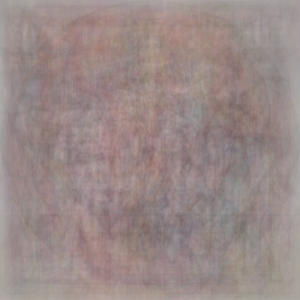

In [17]:
PIL.Image.fromarray(compressed_image_dict['drama'].astype(np.uint8))

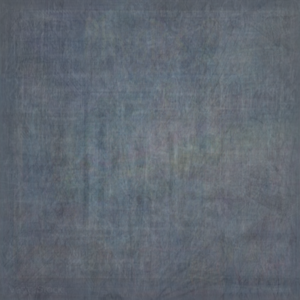

In [18]:
PIL.Image.fromarray(compressed_image_dict['physics'].astype(np.uint8))

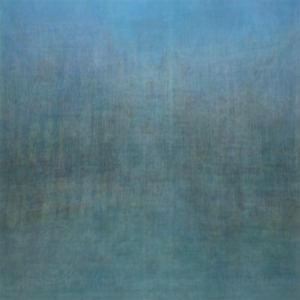

In [19]:
PIL.Image.fromarray(compressed_image_dict['atlantis'].astype(np.uint8))

In [20]:
imageanalysis.save_colorgram_to_disk() 

To perform more advanced analysis of the categories and the relationships between them, we myst calculate color distributions and entropys.

In [21]:
imageanalysis.compress_color_data()

In [22]:
imageanalysis.entropy_computations()

The above 3 methods set-up what we need for the visualisations.

### Visualisations

In [24]:
viz = cs.visualisation.Visualisation(imageanalysis)

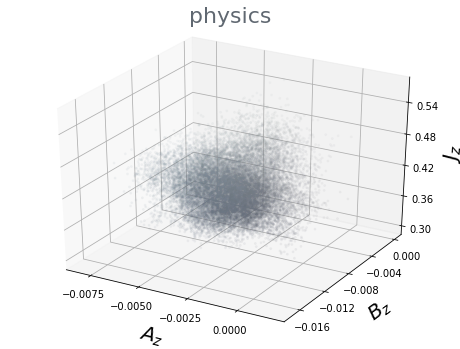

In [25]:
viz.jzazbz_color_distribution('physics')

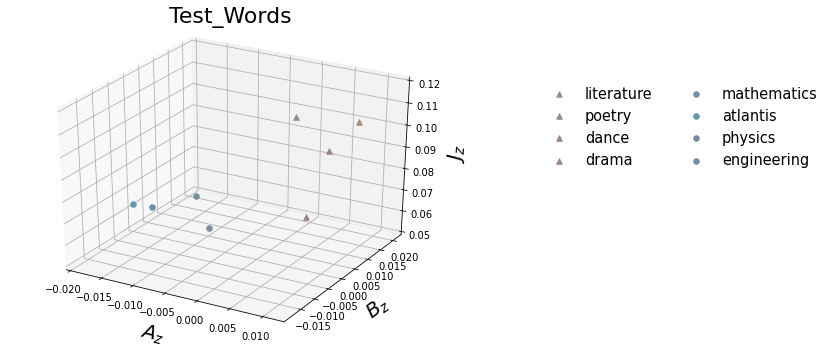

In [26]:
viz.plot_labels_in_space()

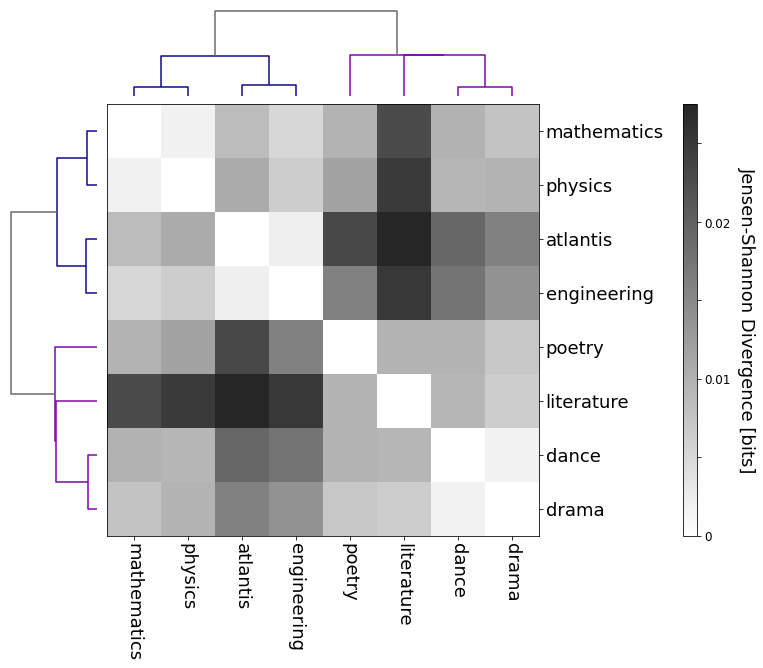

In [27]:
viz.cluster_analysis()

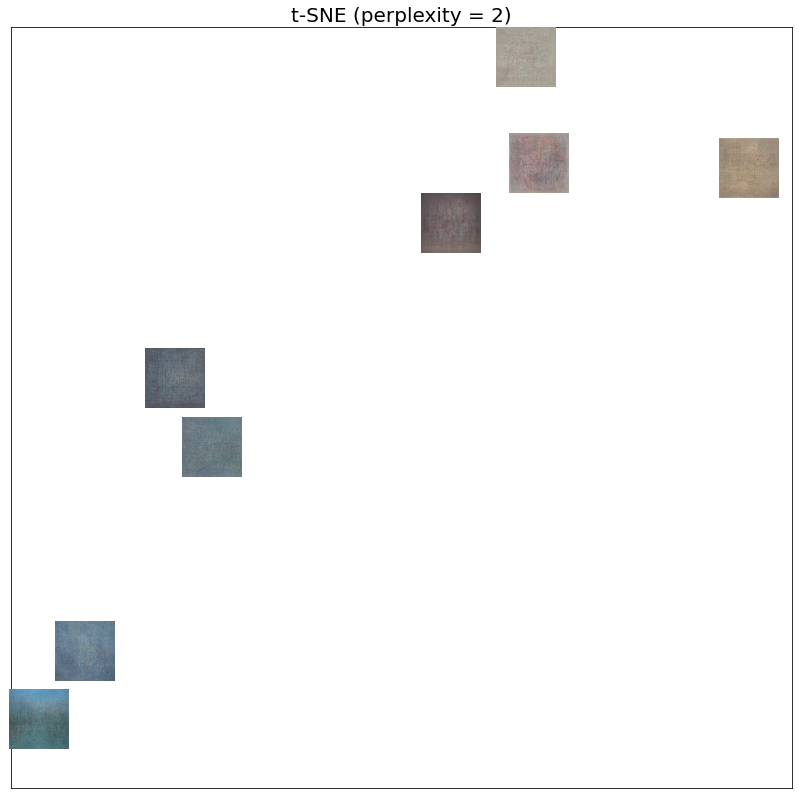

In [28]:
viz.plot_tsne()

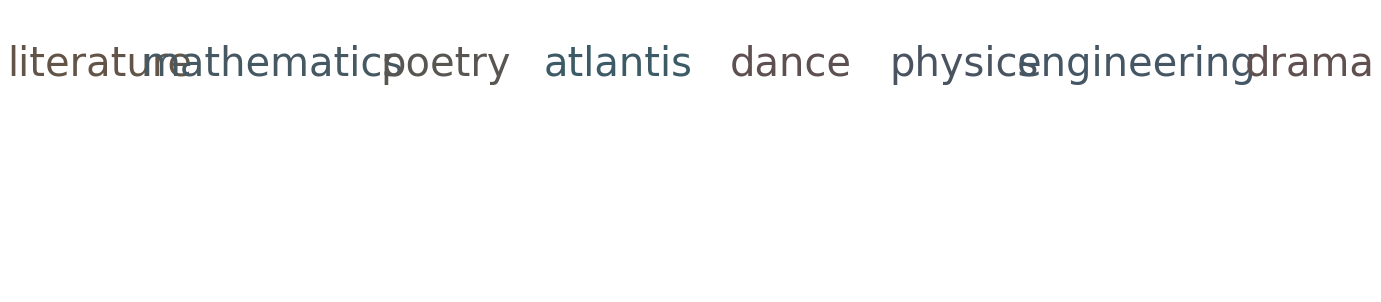

In [29]:
viz.plot_word_colors(word_distance=0.4, size=40)